# Group 7 - Telmanians

• Candel, Sheena </br>
• Hilotin, Tessa Mae</br>
• Javier, Alexandria</br>
• Llamis, Charlyn Jean</br>

## Importing important libraries

In [27]:
from sklearn.neighbors import KNeighborsClassifier

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split,cross_val_score, KFold, GridSearchCV
import seaborn as sns
import mglearn

import warnings
warnings.simplefilter("ignore")

## Reading the Dataset

In [2]:
df=pd.read_csv('Childsmokers.csv')
df

,Age(years),Height (cm),FEV,Sex,Smoker
0,9,145,1.708,female,non
1,8,171,1.724,female,non
2,7,138,1.720,female,non
3,9,135,1.558,male,non
4,9,145,1.895,male,non
...,...,...,...,...,...
649,15,152,2.278,female,smoker
650,16,183,4.872,male,smoker
651,16,170,4.270,male,smoker
652,15,173,3.727,male,smoker


# A. Problem

<AxesSubplot:xlabel='Smoker', ylabel='count'>

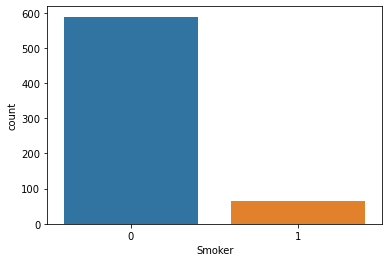

In [25]:
sns.countplot(df['Smoker'],label="Count")

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age(years),654.0,9.931193,2.953935,3.000,8.000,10.0000,12.0000,19.000
Height (cm),654.0,155.298165,14.471647,117.000,145.000,156.0000,166.0000,188.000
FEV,654.0,2.636780,0.867059,0.791,1.981,2.5475,3.1185,5.793


In [5]:
df.Sex.replace({'female':0, 'male':1}, inplace=True)
df.Smoker.replace({'non':0, 'smoker':1}, inplace=True)

In [6]:
X = df[['Age(years)','Height (cm)','FEV','Sex']].values
y = df[['Smoker']].values

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [8]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=7)

In [9]:
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [10]:
X_test

array([[ 13.   , 163.   ,   3.147,   0.   ],
       [  9.   , 175.   ,   3.842,   1.   ],
       [ 12.   , 160.   ,   2.569,   0.   ],
       [  9.   , 163.   ,   2.487,   0.   ],
       [ 13.   , 170.   ,   3.994,   1.   ],
       [ 16.   , 183.   ,   4.872,   1.   ],
       [  9.   , 145.   ,   2.57 ,   1.   ],
       [  9.   , 154.   ,   2.56 ,   0.   ],
       [  8.   , 135.   ,   1.759,   1.   ],
       [  6.   , 137.   ,   1.634,   1.   ],
       [  8.   , 144.   ,   1.844,   0.   ],
       [  6.   , 135.   ,   1.695,   0.   ],
       [ 12.   , 179.   ,   3.279,   1.   ],
       [  9.   , 149.   ,   2.135,   1.   ],
       [  4.   , 124.   ,   1.577,   0.   ],
       [ 15.   , 152.   ,   2.278,   0.   ],
       [ 17.   , 170.   ,   3.082,   1.   ],
       [  9.   , 156.   ,   3.029,   0.   ],
       [  7.   , 142.   ,   2.135,   1.   ],
       [  8.   , 160.   ,   2.503,   1.   ],
       [  5.   , 135.   ,   1.858,   1.   ],
       [ 12.   , 177.   ,   2.822,   1.   ],
       [ 1

In [11]:
print("Test set predictions: {}".format(clf.predict(X_test)))

Test set predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


# B. Three Highights

# The test size that we used was 0.2. 20% of the data is split into the test, while 80% is used to train the model. We are then able to get a 0.88 accuracy from our K Neighbors classification report.

In [12]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.88


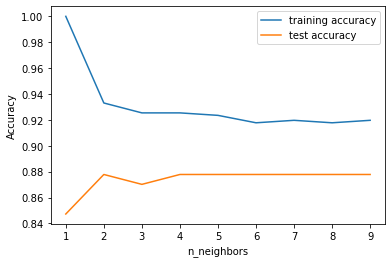

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 10)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

pass

In [14]:
#kfold = model_selection.KFold(n_splits=100)
model=KNeighborsClassifier()
accuracy = cross_val_score(model,X,y, cv=5, scoring='accuracy') 
precision = cross_val_score(model,X,y, cv=5, scoring='precision_macro') 
recall = cross_val_score(model,X,y, cv=5, scoring='recall_macro') 
f1 = cross_val_score(model,X,y, cv=5, scoring='f1_macro')

print('Accuracy is:', accuracy) 
print('Precision is:', precision) 
print('Recall is', recall) 
print('F1-Score is:', f1)

Accuracy is: [0.90839695 0.90076336 0.90076336 0.85496183 0.80769231]
Precision is: [0.95384615 0.45038168 0.70348837 0.51371951 0.60576923]
Recall is [0.53846154 0.5        0.53422425 0.50880052 0.68803419]
F1-Score is: [0.54723502 0.47389558 0.54035088 0.50819996 0.62292609]


In [44]:
accuracy_rate = []

# Range of n_neighbors for KNN
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    accuracy_rate.append(scores.mean())

In [48]:
sum(accuracy_rate)/len(accuracy_rate)


0.9069929730133809

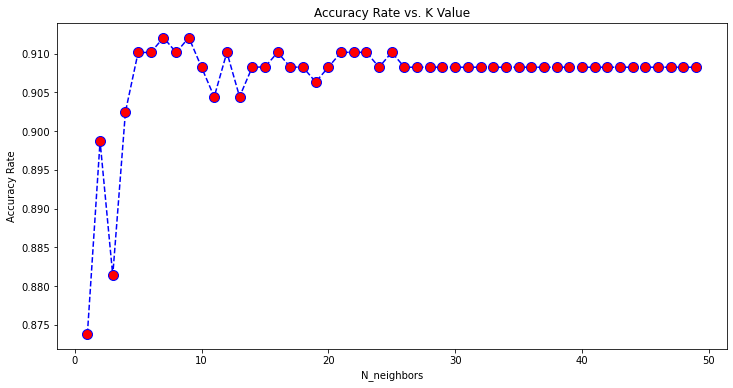

In [49]:
plt.figure(figsize=(12,6))

accuracy_plot = plt.plot(range(1,50), accuracy_rate, color='blue', linestyle='dashed', marker='o', 
    markerfacecolor='red', markersize=10)

accuracy_plot = plt.title('Accuracy Rate vs. K Value')

accuracy_plot = plt.xlabel('N_neighbors')

accuracy_plot = plt.ylabel('Accuracy Rate')

In [17]:
error_rate = []

# Range of n_neighbors for KNN
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    error_rate.append(1 - scores.mean())

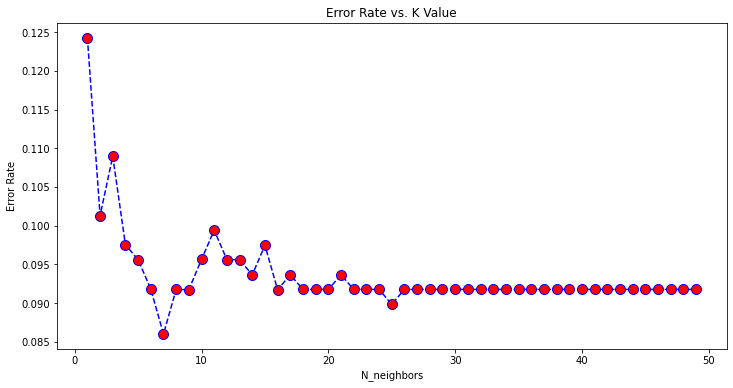

In [18]:
plt.figure(figsize=(12,6))

error_rate_plot = plt.plot(range(1,50), error_rate, color='blue', linestyle='dashed', marker='o', 
    markerfacecolor='red', markersize=10)

error_rate_plot = plt.title('Error Rate vs. K Value')

error_rate_plot = plt.xlabel('N_neighbors')

error_rate_plot = plt.ylabel('Error Rate')

In [19]:
from sklearn.model_selection import cross_val_score                         

neighbors = []                                                             
cv_scores = []                                                          


for k in range(1, 51, 2):                                                   
    neighbors.append(k) 
    knn = KNeighborsClassifier(n_neighbors = k)                             
    scores = cross_val_score( 
        knn, X_train, y_train, cv = 10, scoring = 'accuracy') 
    cv_scores.append(scores.mean()) 
    

    
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)   

[0.89393939 0.89393939 0.89393939 0.89393939 0.90769231 0.90769231
 0.90769231 0.90769231 0.90769231 0.87692308]


# By plotting the Misclassification Error we will be able to know the optimal number of K neighbors. This will help us get the highest accuracy score.

The optimal number of K neighbors = 7 


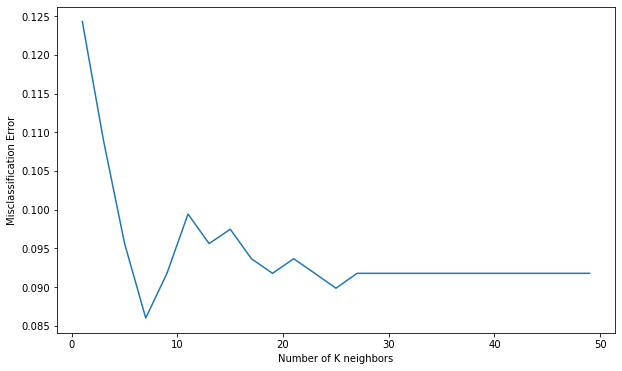

In [20]:
MSE = [1-x for x in cv_scores]                                               # Changing to misclassification error

# Determining the best k value
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of K neighbors = %d ' %optimal_k)

# Plot misclassification error versus k
plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of K neighbors')
plt.ylabel('Misclassification Error')
plt.show()

K= 7 is the optimal K value with minimal misclassification error.

# The researchers have predicted that out of 148 samples, 17 of them are children who smoke and 131 are non-smokers.

In [21]:
model=KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# Generate the summary of the predictions (Classification Report) made by the classifier
from sklearn.metrics import classification_report

print("Classification Report : \n\n")
print(classification_report(y_test, y_pred))

Classification Report : 


              precision    recall  f1-score   support

           0       0.88      1.00      0.93       114
           1       1.00      0.06      0.11        17

    accuracy                           0.88       131
   macro avg       0.94      0.53      0.52       131
weighted avg       0.89      0.88      0.83       131



# C. Data discussion

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age(years)   654 non-null    int64  
 1   Height (cm)  654 non-null    int64  
 2   FEV          654 non-null    float64
 3   Sex          654 non-null    int64  
 4   Smoker       654 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 25.7 KB


# D. k_NN implementation

In [22]:
from sklearn.metrics import accuracy_score
print('Accuracy of child smoking using KNN =',accuracy_score(y_pred,y_test)*100)

Accuracy of child smoking using KNN = 87.78625954198473


Text(91.68, 0.5, 'predicted class')

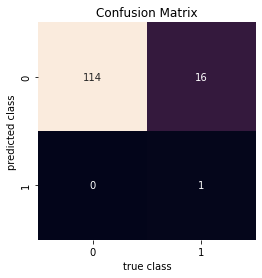

In [23]:
from sklearn.metrics import confusion_matrix 

# Summary of the predictions made by the classifier
mat = confusion_matrix(y_test, y_pred) 
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False) 

plt.title('Confusion Matrix')
plt.xlabel('true class') 
plt.ylabel('predicted class')

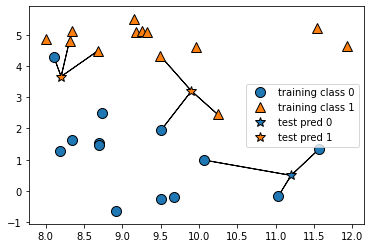

In [28]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

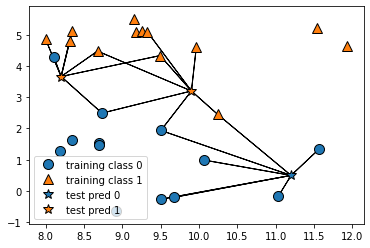

In [33]:
import mglearn
mglearn.plots.plot_knn_classification(n_neighbors=7)